In [0]:
import keras
from shutil import copyfile
import os
from keras.preprocessing.image import load_img ,img_to_array
import matplotlib.pyplot as plt
from keras import layers
import tensorflow as tf
from keras.layers import BatchNormalization
import numpy as np
from skimage.io import imread
from skimage.transform import resize
from keras.utils.vis_utils import plot_model
import numpy as np
from skimage.io import imread
from skimage.transform import resize
import numpy as np
from tqdm import tqdm_notebook
import os 
from keras.preprocessing import image
from tqdm import tqdm_notebook

Using TensorFlow backend.


In [0]:
latent_dim = 128
height = 64
width = 64
channels = 3
import keras
from keras import layers
import os
import tensorflow as tf
from keras.layers import BatchNormalization

In [0]:
generator_input = keras.Input(shape=(latent_dim,))
x = layers.Dense(128 * 32 * 32)(generator_input)
x = layers.LeakyReLU()(x)
x = layers.Reshape((32, 32, 128))(x)

x = layers.Conv2D(256, 5, padding='same')(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2DTranspose(256, 4, strides=2, padding='same')(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2D(256, 5, padding='same')(x)
x = layers.LeakyReLU()(x)
x = layers.Conv2D(256, 5, padding='same')(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2D(channels, 7, activation='tanh', padding='same')(x)
generator = keras.models.Model(generator_input, x)
generator.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 131072)            16908288  
_________________________________________________________________
leaky_re_lu_10 (LeakyReLU)   (None, 131072)            0         
_________________________________________________________________
reshape_2 (Reshape)          (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 32, 32, 256)       819456    
_________________________________________________________________
leaky_re_lu_11 (LeakyReLU)   (None, 32, 32, 256)       0         
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 64, 64, 256)       1048

In [0]:
discriminator_input = layers.Input(shape=(height, width, channels))

x = layers.Conv2D(128, 3)(discriminator_input)
x = layers.LeakyReLU()(x)
x = layers.Conv2D(128, 4, strides=2)(x)
x = layers.LeakyReLU()(x)
x = layers.Conv2D(128, 4, strides=2)(x)
x = layers.LeakyReLU()(x)
x = layers.Conv2D(128, 4, strides=2)(x)
x = layers.LeakyReLU()(x)
x = layers.Flatten()(x)

x = layers.Dropout(0.4)(x)

x = layers.Dense(1, activation='sigmoid')(x)

discriminator = keras.models.Model(discriminator_input, x)
discriminator.summary()


Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 62, 62, 128)       3584      
_________________________________________________________________
leaky_re_lu_15 (LeakyReLU)   (None, 62, 62, 128)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 30, 30, 128)       262272    
_________________________________________________________________
leaky_re_lu_16 (LeakyReLU)   (None, 30, 30, 128)       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 14, 14, 128)       262272    
_________________________________________________________________
leaky_re_lu_17 (LeakyReLU)   (None, 14, 14, 128)       0   

In [0]:
discriminator_optimizer = keras.optimizers.RMSprop(lr=0.0008, clipvalue=1.0, decay=1e-8)
discriminator.compile(optimizer=discriminator_optimizer, loss='binary_crossentropy')

discriminator.trainable = False

gan_input = keras.Input(shape=(latent_dim,))
gan_output = discriminator(generator(gan_input))
gan = keras.models.Model(gan_input, gan_output)

gan_optimizer = keras.optimizers.RMSprop(lr=0.0004, clipvalue=1.0, decay=1e-8)
gan.compile(optimizer=gan_optimizer, loss='binary_crossentropy')

In [0]:
gan.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 128)               0         
_________________________________________________________________
model_4 (Model)              (None, 64, 64, 3)         22091523  
_________________________________________________________________
model_5 (Model)              (None, 1)                 795009    
Total params: 22,886,532
Trainable params: 22,091,523
Non-trainable params: 795,009
_________________________________________________________________


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import zipfile
zip_ref = zipfile.ZipFile("/content/gdrive/My Drive/anime-faces.zip", 'r')
zip_ref.extractall("/content/data")
zip_ref.close()

In [0]:
import os
from skimage.transform import rescale
from skimage.transform import resize
list_file = os.listdir('data/data/data')
print(len(list_file))

21551


In [0]:
import numpy as np
from skimage.io import imread
data_train_gan = np.array([resize(imread(os.path.join('data/data/data',file_name)), (64, 64)) for file_name in list_file])

In [0]:
x_train = data_train_gan
iterations = 10000
batch_size = 64
save_dir = '.'


start = 0
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


discriminator loss: 0.7177215
advesarial loss: 0.7116442


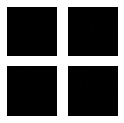

discriminator loss: 0.7177215
advesarial loss: 0.7116442


/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


discriminator loss: 0.24775422
advesarial loss: 12.922836


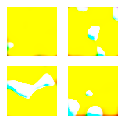

In [0]:
for step in tqdm_notebook(range(iterations)):
  random_latent_vectors = np.random.normal(size = (batch_size, latent_dim))
  generated_images = generator.predict(random_latent_vectors)
  stop = start + batch_size
  real_images = x_train[start: stop]
  combined_images = np.concatenate([generated_images, real_images])
  labels = np.concatenate([np.ones((batch_size,1)), 
                                    np.zeros((batch_size, 1))])
  labels += 0.05 * np.random.random(labels.shape)
  
  d_loss = discriminator.train_on_batch(combined_images, labels)
  
  random_latent_vectors = np.random.normal(size=(batch_size, 
                                                 latent_dim))
  misleading_targets = np.zeros((batch_size, 1))
  a_loss = gan.train_on_batch(random_latent_vectors, 
                              misleading_targets)
  start += batch_size
  
  if start > len(x_train) - batch_size:
    start = 0
 
  if step % 10 == 0:
    print('discriminator loss:', d_loss)
    print('advesarial loss:', a_loss)
    fig, axes = plt.subplots(2, 2)
    fig.set_size_inches(2,2)
    count = 0
    for i in range(2):
      for j in range(2):
        axes[i, j].imshow(resize(generated_images[count], (64,64)))
        axes[i, j].axis('off')
        count += 1
    plt.show()
    
  if step % 100 == 0:
    gan.save_weights('model.h5')
    
    print('discriminator loss:', d_loss)
    print('advesarial loss:', a_loss)

FileNotFoundError: ignored